In [19]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
df = pd. read_excel(r'C:\Users\ADMIN\OneDrive\Desktop\AI Project\Concrete_Data.xls')
df

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [3]:
data = df.to_numpy()
x = data[:, 0:8]
y = data[:, 8]

x.shape,y.shape

((1030, 8), (1030,))

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
x_train.shape,x_test,y_train.shape,y_test.shape

((824, 8),
 array([[ 236.9,   91.7,   71.5, ...,  852.9,  695.4,   28. ],
        [ 389.9,  189. ,    0. , ...,  944.7,  755.8,   56. ],
        [ 424. ,   22. ,  132. , ...,  822. ,  750. ,   28. ],
        ...,
        [ 299.8,    0. ,  119.8, ...,  878.2,  727.6,   28. ],
        [ 339. ,    0. ,    0. , ..., 1069. ,  754. ,   28. ],
        [ 252. ,    0. ,    0. , ..., 1111. ,  784. ,    7. ]]),
 (824,),
 (206,))

In [5]:
def create_model_more_hidden_layers(num_input_cols, num_output_cols):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(10, activation='relu', input_shape=(num_input_cols,)),
        tf.keras.layers.Dense(50, activation='relu'),
        tf.keras.layers.Dense(100, activation='relu'),
        tf.keras.layers.Dense(100, activation='relu'),
        tf.keras.layers.Dense(100, activation='relu'),
        tf.keras.layers.Dense(100, activation='relu'),
        tf.keras.layers.Dense(50, activation='relu'),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(num_output_cols)
    ])
    
    return model

In [6]:
def train_test_model(model, x_train, y_train, x_test, y_test, num_epochs, learning_rate):
    criterion = tf.keras.losses.MeanSquaredError()
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    for epoch in range(num_epochs):
        with tf.GradientTape() as tape:
            y_pred_train = model(x_train, training=True)
            loss_train = criterion(y_train, y_pred_train)

        gradients = tape.gradient(loss_train, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

        y_pred_test = model(x_test, training=False)
        loss_test = criterion(y_test, y_pred_test)

        if (epoch + 1) % 1000 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Training Loss: {loss_train.numpy():.4f}, Testing Loss: {loss_test.numpy():.4f}")

    print("Training finished.")

In [7]:
num_input_cols = x_train.shape[1]
num_output_cols = 1  # or more if predicting multiple outputs
num_epochs = 10000
learning_rate = 0.0001

model = create_model_more_hidden_layers(num_input_cols, num_output_cols)
train_test_model(model, x_train, y_train, x_test, y_test, num_epochs, learning_rate)

c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch [1000/10000], Training Loss: 111.8575, Testing Loss: 98.5175
Epoch [2000/10000], Training Loss: 38.7903, Testing Loss: 45.5107
Epoch [3000/10000], Training Loss: 24.1439, Testing Loss: 33.5688
Epoch [4000/10000], Training Loss: 18.7504, Testing Loss: 29.0906
Epoch [5000/10000], Training Loss: 15.4664, Testing Loss: 25.4164
Epoch [6000/10000], Training Loss: 14.1270, Testing Loss: 26.8434
Epoch [7000/10000], Training Loss: 12.1900, Testing Loss: 25.9964
Epoch [8000/10000], Training Loss: 11.2825, Testing Loss: 25.1882
Epoch [9000/10000], Training Loss: 10.2340, Testing Loss: 25.1636
Epoch [10000/10000], Training Loss: 9.8794, Testing Loss: 26.0113
Training finished.


In [8]:
y_test_predict = model(x_test, training=False)

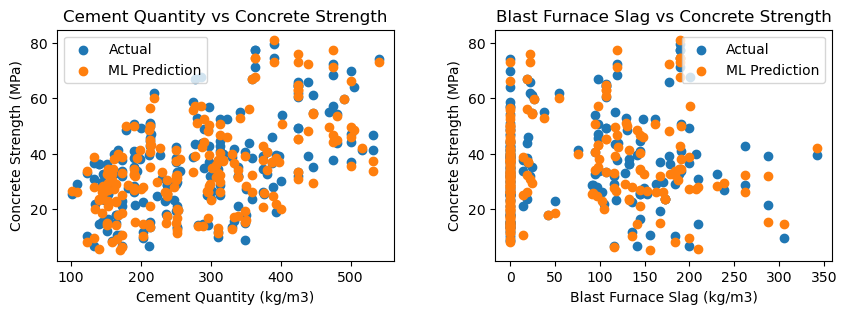

In [10]:
# create subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

# Cement Quantity vs Concrete Strength
axes[0].scatter(x_test[:, 0], y_test, label='Actual')
axes[0].scatter(x_test[:, 0], y_test_predict, label='ML Prediction')
axes[0].set_xlabel('Cement Quantity (kg/m3)')
axes[0].set_ylabel('Concrete Strength (MPa)')
axes[0].set_title('Cement Quantity vs Concrete Strength')
axes[0].legend()

# Blast Furnace Slag vs Concrete Strength
axes[1].scatter(x_test[:, 1], y_test, label='Actual')
axes[1].scatter(x_test[:, 1], y_test_predict, label='ML Prediction')
axes[1].set_xlabel('Blast Furnace Slag (kg/m3)')
axes[1].set_ylabel('Concrete Strength (MPa)')
axes[1].set_title('Blast Furnace Slag vs Concrete Strength')
axes[1].legend()

# adjust spacing between subplots
fig.subplots_adjust(wspace=0.3)

# display plot
plt.show()

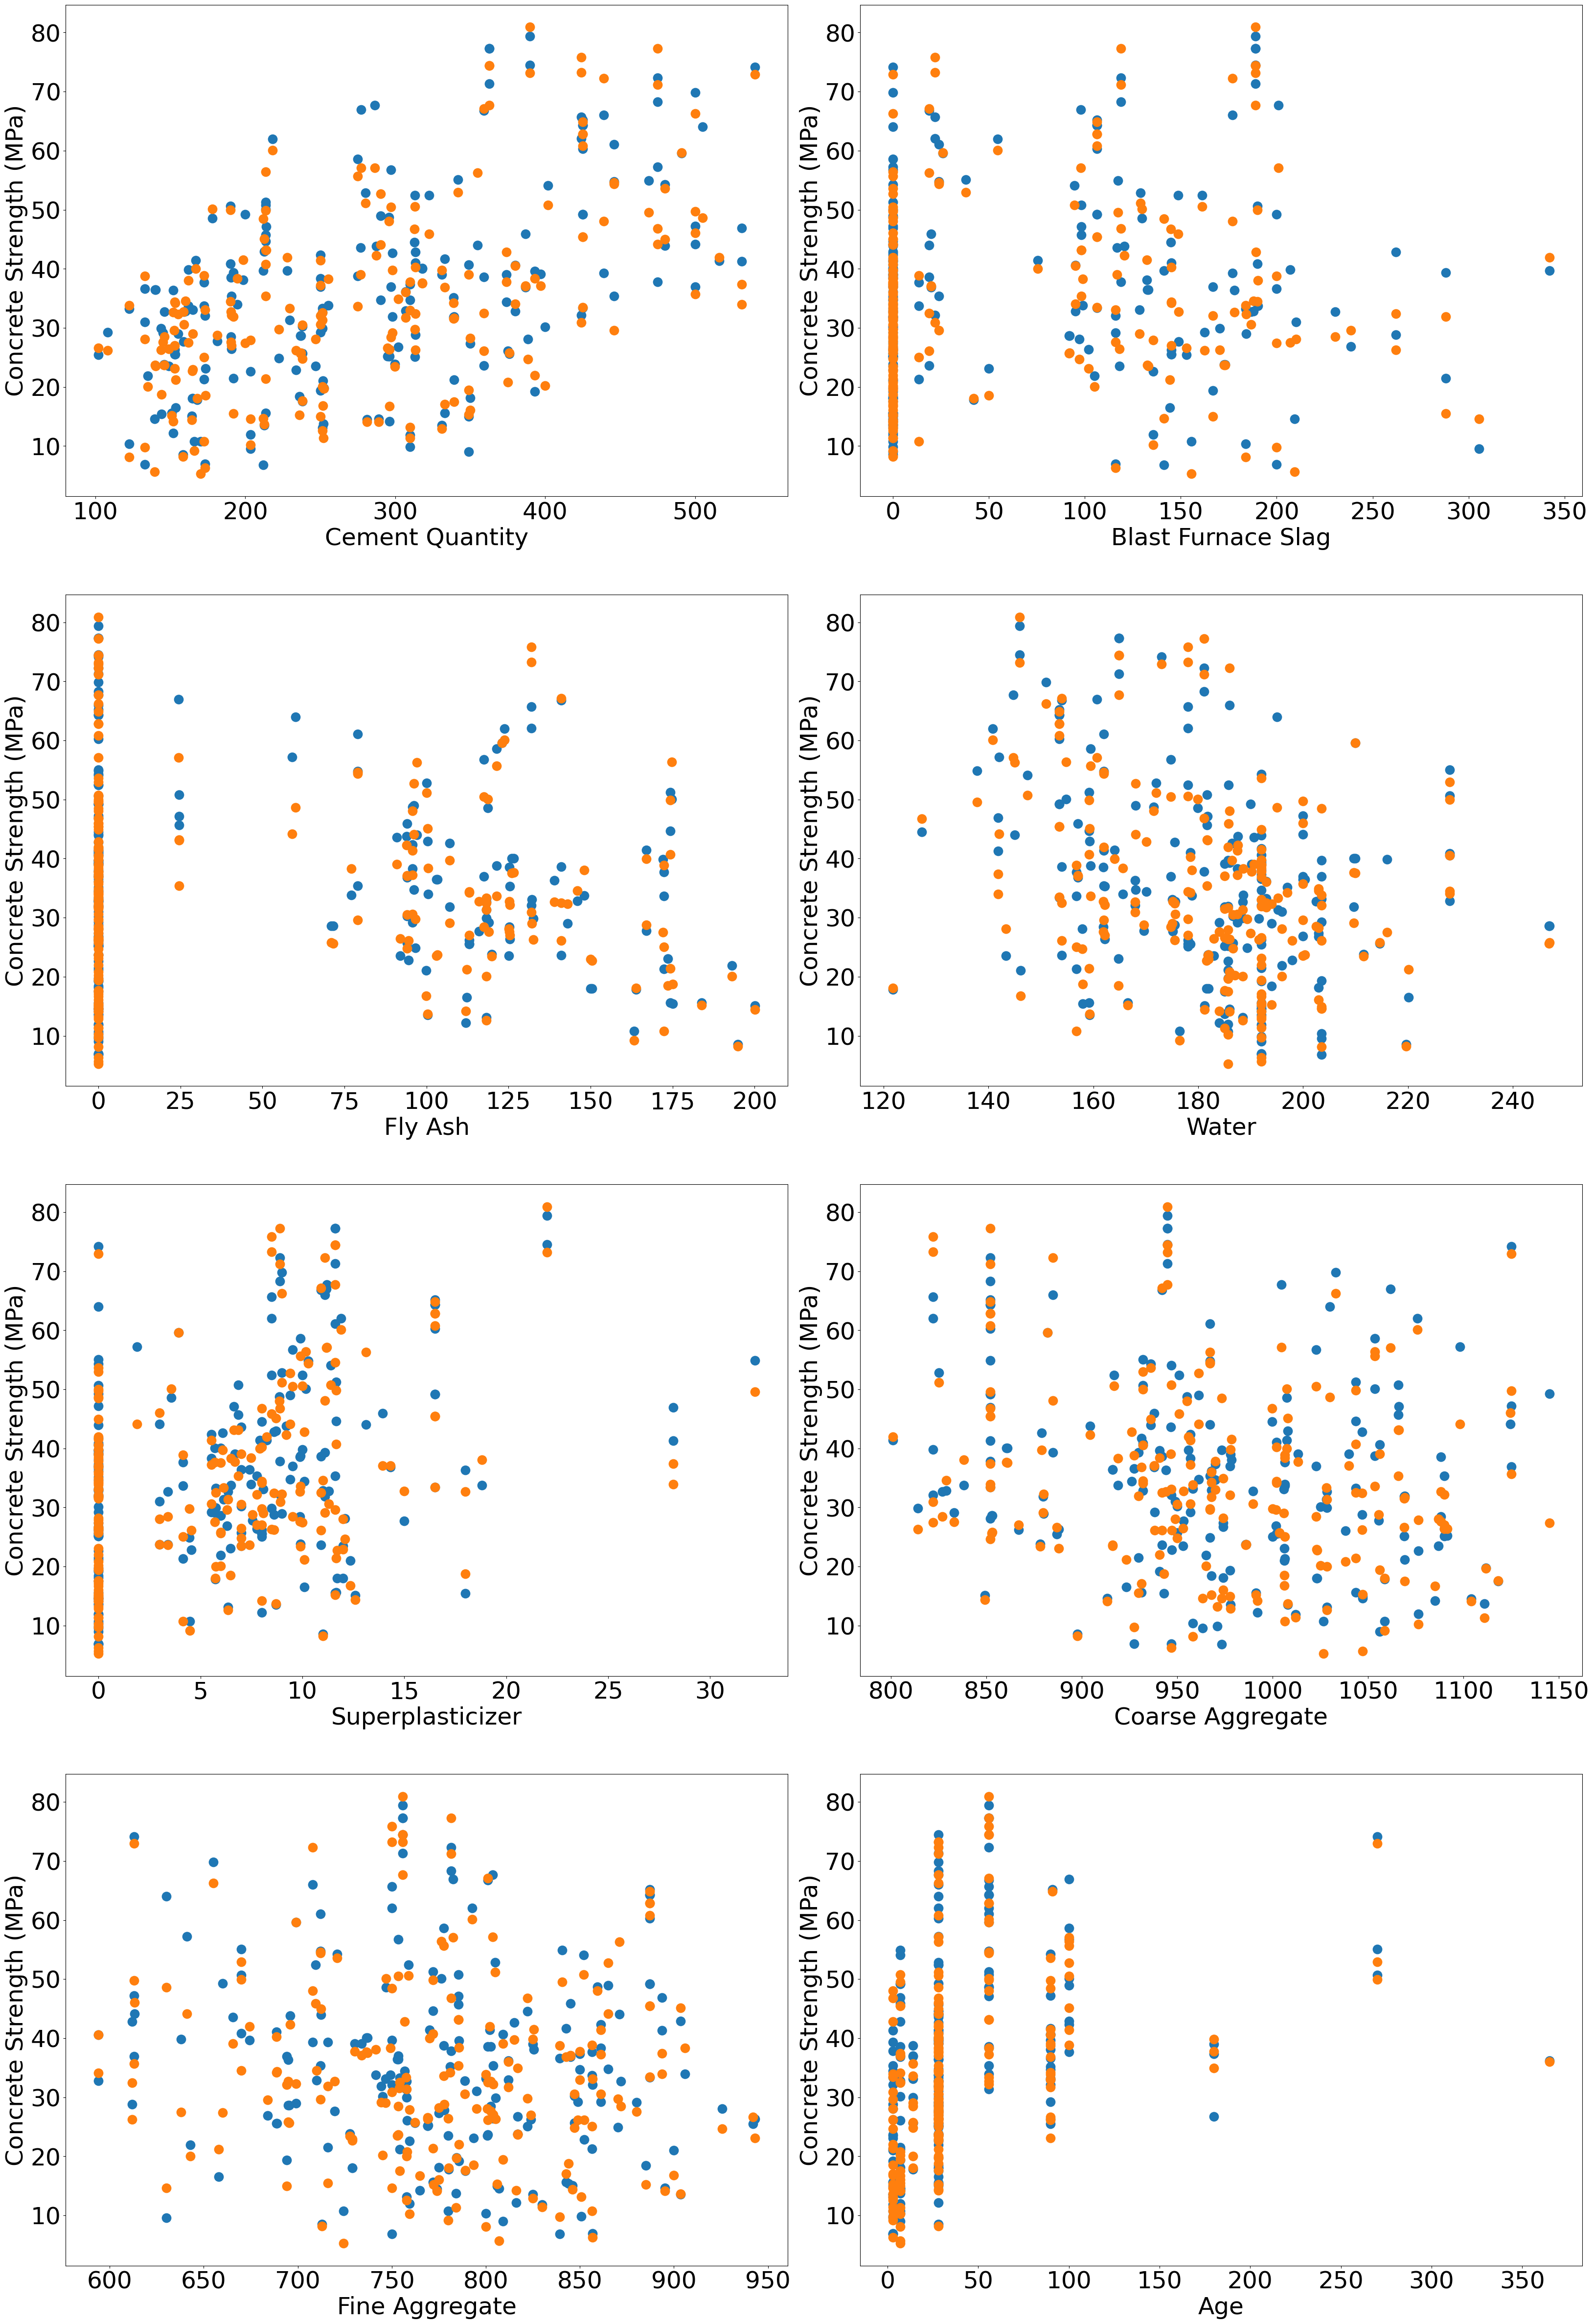

In [11]:
plt.rc('font', size=35) # Update font sizes of all subplots in one go
fig, axes = plt.subplots(4, 2, figsize=(40, 60))

feature_title = [ 'Cement Quantity',
                  'Blast Furnace Slag',
                  'Fly Ash',
                  'Water',
                  'Superplasticizer',
                  'Coarse Aggregate',
                  'Fine Aggregate',
                  'Age']

for row in range(0, axes.shape[0]):
    for col in range(0, axes.shape[1]):
        feature_id = row * axes.shape[1] + col
        axes[row, col].scatter(x_test[:, feature_id], y_test, s=175)
        axes[row, col].scatter(x_test[:, feature_id], y_test_predict, s=175)
        axes[row, col].set_xlabel(feature_title[feature_id])
        axes[row, col].set_ylabel('Concrete Strength (MPa)')

# adjust spacing between subplots
fig.subplots_adjust(wspace=0.1)

# display plot
plt.show()

In [12]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import r2_score

In [13]:
def test_r2_score_with_tensorflow():
    # Simulate y_test as a numpy array
    y_test = np.array([10.0, 20.0, 30.0, 40.0, 50.0])
    
    # Simulate y_test_predict as a TensorFlow tensor
    y_test_predict = tf.constant([12.0, 18.0, 29.0, 41.0, 49.0], dtype=tf.float32)
    
    # Convert TensorFlow tensor to numpy array
    y_test_predict_np = y_test_predict.numpy()
    
    # Calculate R2 score
    r2 = r2_score(y_test, y_test_predict_np)
    
    # Assert the R2 score is within expected range
    assert -1.0 <= r2 <= 1.0, f"R2 score out of range: {r2}"
    print(f"Test passed. R2 score: {r2}")


In [17]:
test_r2_score_with_tensorflow()

Test passed. R2 score: 0.989


saving the model

In [18]:
# Save the model in .keras format
model.save('C:\\Users\\ADMIN\\Downloads\\concrete_tensorflow_model.keras')

